In [1]:
from random import randint

import cv2
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
cifar_10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [5]:
lookup = [
          'Airplane',
          'Automobile',
          'Bird',
          'Cat',
          'Deer',
          'Dog',
          'Frog',
          'Horse',
          'Ship',
          'Truck'
]

In [6]:
def show_img(images, labels, n_images):

  random_int = randint(0, labels.shape[0] - n_images)

  imgs, labels = images[random_int: random_int + n_images], \
                  labels[random_int: random_int + n_images]
  
  _, figs = plt.subplots(1, n_images, figsize=(n_images * 3, 3))

  for fig, img, label in zip(figs, imgs, labels):

    fig.imshow(img)
    ax = fig.axes

    ax.set_title(lookup[int(label)])
    ax.title.set_fontsize(20)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

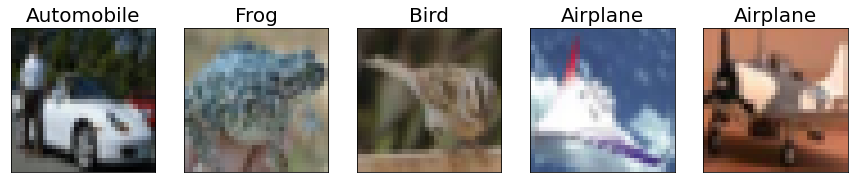

In [7]:
show_img(train_images, train_labels, 5)

In [8]:
data_path = os.path.join(os.getcwd(), 'data')
os.mkdir(data_path)
train_dir = os.path.join(data_path, 'train')
os.mkdir(train_dir)
test_dir = os.path.join(data_path, 'test')
os.mkdir(test_dir)

In [9]:
for parent_dir in [train_dir, test_dir]:
  for class_ in lookup:
    class_path = os.path.join(parent_dir, class_)
    os.mkdir(class_path)
    print(f'{class_path} directory created')

/content/data/train/Airplane directory created
/content/data/train/Automobile directory created
/content/data/train/Bird directory created
/content/data/train/Cat directory created
/content/data/train/Deer directory created
/content/data/train/Dog directory created
/content/data/train/Frog directory created
/content/data/train/Horse directory created
/content/data/train/Ship directory created
/content/data/train/Truck directory created
/content/data/test/Airplane directory created
/content/data/test/Automobile directory created
/content/data/test/Bird directory created
/content/data/test/Cat directory created
/content/data/test/Deer directory created
/content/data/test/Dog directory created
/content/data/test/Frog directory created
/content/data/test/Horse directory created
/content/data/test/Ship directory created
/content/data/test/Truck directory created


In [20]:

for i, (img, label) in enumerate(zip(train_images, train_labels)):
  path = os.path.join(train_dir, str(lookup[int(label)]))

  cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
  
  cv2.waitKey(0)


In [21]:

for i, (img, label) in enumerate(zip(test_images, test_labels)):
  path = os.path.join(test_dir, str(lookup[int(label)]))

  cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
  
  cv2.waitKey(0)


In [22]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [23]:
batch_size = 64

In [24]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(32,32))

Found 50000 images belonging to 10 classes.


In [25]:
test_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(32,32))

Found 10000 images belonging to 10 classes.


In [27]:
sample_batch = next(train_data_gen)
sample_batch[0].shape

(64, 32, 32, 3)

In [28]:
conv_model = tf.keras.models.Sequential([
                                         layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',
                                                       input_shape=sample_batch[0].shape[1:]),
                                         layers.Conv2D(32, 3, padding='same', activation='relu'),
                                         layers.MaxPooling2D(2),

                                         layers.Conv2D(64, 3, padding='same', activation='relu'),
                                         layers.Conv2D(128, 3, padding='same', activation='relu'),
                                         layers.MaxPooling2D(2),

                                         layers.Flatten(),

                                         layers.Dense(512, activation='relu'),
                                         layers.Dense(256, activation='relu'),
                                         layers.Dense(10, activation='softmax')
])

In [29]:
conv_model.compile(optimizer='adam',
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=['accuracy'])

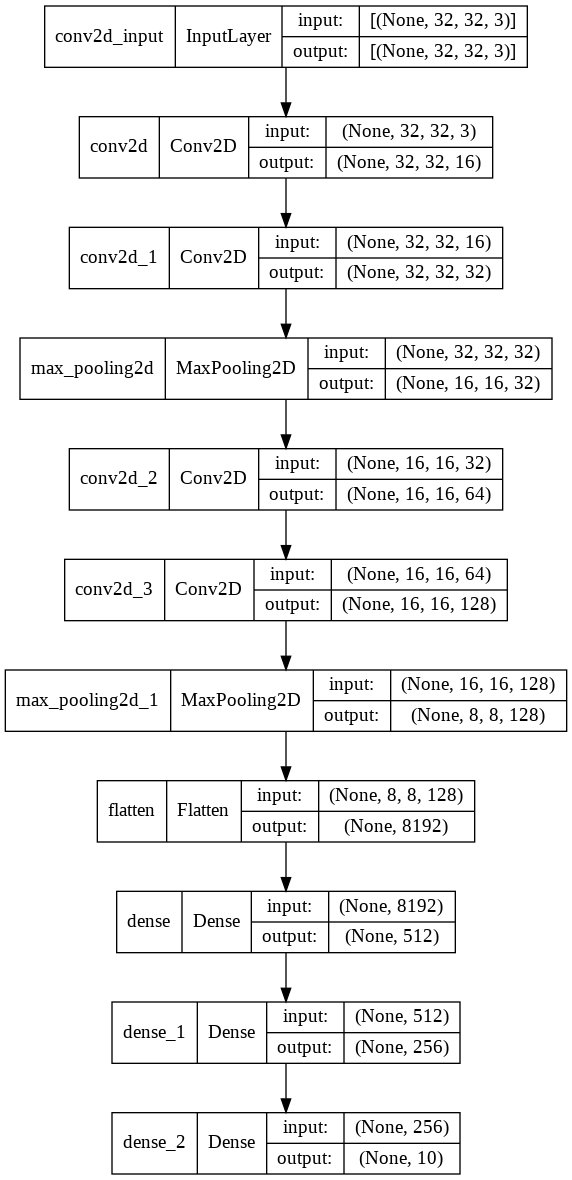

In [31]:
keras.utils.plot_model(conv_model, show_shapes=True)

In [32]:
hist = conv_model.fit(train_data_gen,
                      epochs=10,
                      steps_per_epoch=len(train_images) // batch_size,
                      validation_data=test_data_gen,
                      validation_steps=len(test_images) // batch_size)

Epoch 1/10
781/781 [==============================] - 343s 438ms/step - loss: 1.3426 - accuracy: 0.5124 - val_loss: 1.0084 - val_accuracy: 0.6437
Epoch 2/10
781/781 [==============================] - 317s 406ms/step - loss: 0.8545 - accuracy: 0.6984 - val_loss: 0.8546 - val_accuracy: 0.7027
Epoch 3/10
781/781 [==============================] - 316s 404ms/step - loss: 0.6274 - accuracy: 0.7781 - val_loss: 0.7607 - val_accuracy: 0.7430
Epoch 4/10
781/781 [==============================] - 313s 401ms/step - loss: 0.4490 - accuracy: 0.8420 - val_loss: 0.7604 - val_accuracy: 0.7488
Epoch 5/10
781/781 [==============================] - 314s 402ms/step - loss: 0.2868 - accuracy: 0.8993 - val_loss: 0.9722 - val_accuracy: 0.7282
Epoch 6/10
781/781 [==============================] - 315s 403ms/step - loss: 0.1849 - accuracy: 0.9358 - val_loss: 1.0501 - val_accuracy: 0.7416
Epoch 7/10
781/781 [==============================] - 313s 401ms/step - loss: 0.1281 - accuracy: 0.9553 - val_loss: 1.1327 -

In [33]:
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-wdxb536q
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-wdxb536q
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=173744 sha256=d1727ad613a9b1a7c61ed74a3aa0c535298e150101614245e2cca7bfb7c08c41
  Stored in directory: /tmp/pip-ephem-wheel-cache-u4nnqupi/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


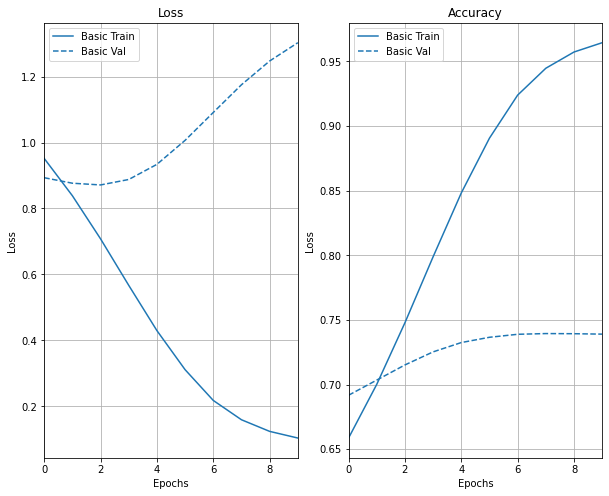

In [34]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plotter.plot({'Basic': hist}, metric='loss')
plt.ylabel('Loss')
plt.title('Loss')

plt.subplot(1, 2, 2)
plotter.plot({'Basic': hist}, metric='accuracy')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show();